# Preprocessing Test

## Imports

In [1]:
import sys
sys.path.append('..')

import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from src.data.dataset import get_dataloaders
from src.data.preprocessing import get_normalization_params

## Load Splits

In [2]:
train_indices = np.load('../data/splits/train_indices.npy')
val_indices = np.load('../data/splits/val_indices.npy')

print(f"Train indices: {len(train_indices)}")
print(f"Val indices: {len(val_indices)}")

Train indices: 2929
Val indices: 733


## Create DataLoaders

In [3]:
csv_file = '../data/raw/train.csv'
img_dir = '../data/raw/train_images'

train_loader, val_loader, train_dataset, val_dataset = get_dataloaders(
    csv_file=csv_file,
    img_dir=img_dir,
    train_indices=train_indices,
    val_indices=val_indices,
    batch_size=16,
    num_workers=0,  # Set to 0 for debugging, increase for actual training
    image_size=224,
    preprocess=True,
    apply_clahe=False,
    advanced_aug=False
)

print(f"\nTrain loader: {len(train_loader)} batches")
print(f"Val loader: {len(val_loader)} batches")


Train loader: 184 batches
Val loader: 46 batches


## Check Class Distribution

In [4]:
print("Train dataset class distribution:")
print(train_dataset.get_class_distribution())

print("\nValidation dataset class distribution:")
print(val_dataset.get_class_distribution())

Train dataset class distribution:
{0: 1444, 1: 296, 2: 799, 3: 154, 4: 236}

Validation dataset class distribution:
{0: 361, 1: 74, 2: 200, 3: 39, 4: 59}


## Get Class Weights

In [5]:
class_weights = train_dataset.get_class_weights()
print("\nClass weights for handling imbalance:")
for i, weight in enumerate(class_weights):
    print(f"  Class {i}: {weight:.4f}")


Class weights for handling imbalance:
  Class 0: 0.4057
  Class 1: 1.9791
  Class 2: 0.7332
  Class 3: 3.8039
  Class 4: 2.4822


## Visualze a Batch

In [12]:
def denormalize(tensor):
    """Denormalize image tensor for visualization"""
    mean, std = get_normalization_params()
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean

## Get One Batch

In [13]:
images, labels = next(iter(train_loader))

print(f"Batch shape: {images.shape}")
print(f"Labels: {labels}")
print(f"Image dtype: {images.dtype}")
print(f"Image range: [{images.min():.3f}, {images.max():.3f}]")

Batch shape: torch.Size([16, 3, 224, 224])
Labels: tensor([3, 0, 0, 2, 4, 2, 2, 2, 3, 0, 0, 2, 4, 0, 2, 4])
Image dtype: torch.float32
Image range: [-2.118, 2.640]


## Display Images from Batch

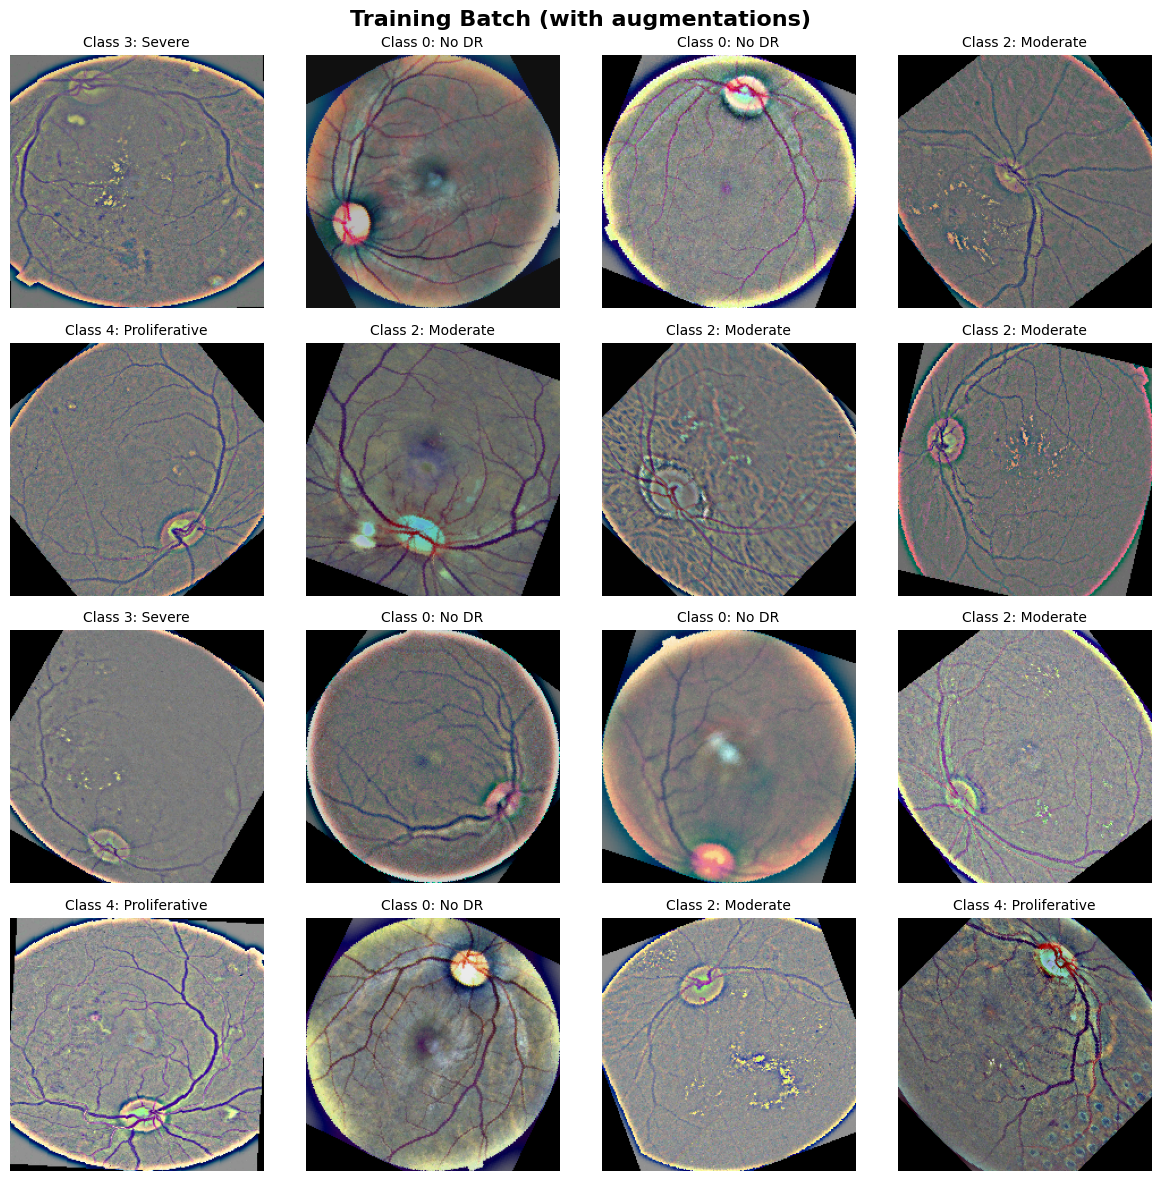

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Training Batch (with augmentations)', fontsize=16, fontweight='bold')

class_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']

for idx, ax in enumerate(axes.flat):
    if idx < len(images):
        # Denormalize and convert to numpy
        img = denormalize(images[idx]).permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        
        ax.imshow(img)
        ax.set_title(f'Class {labels[idx]}: {class_names[labels[idx]]}', fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


## Test Validation Loader

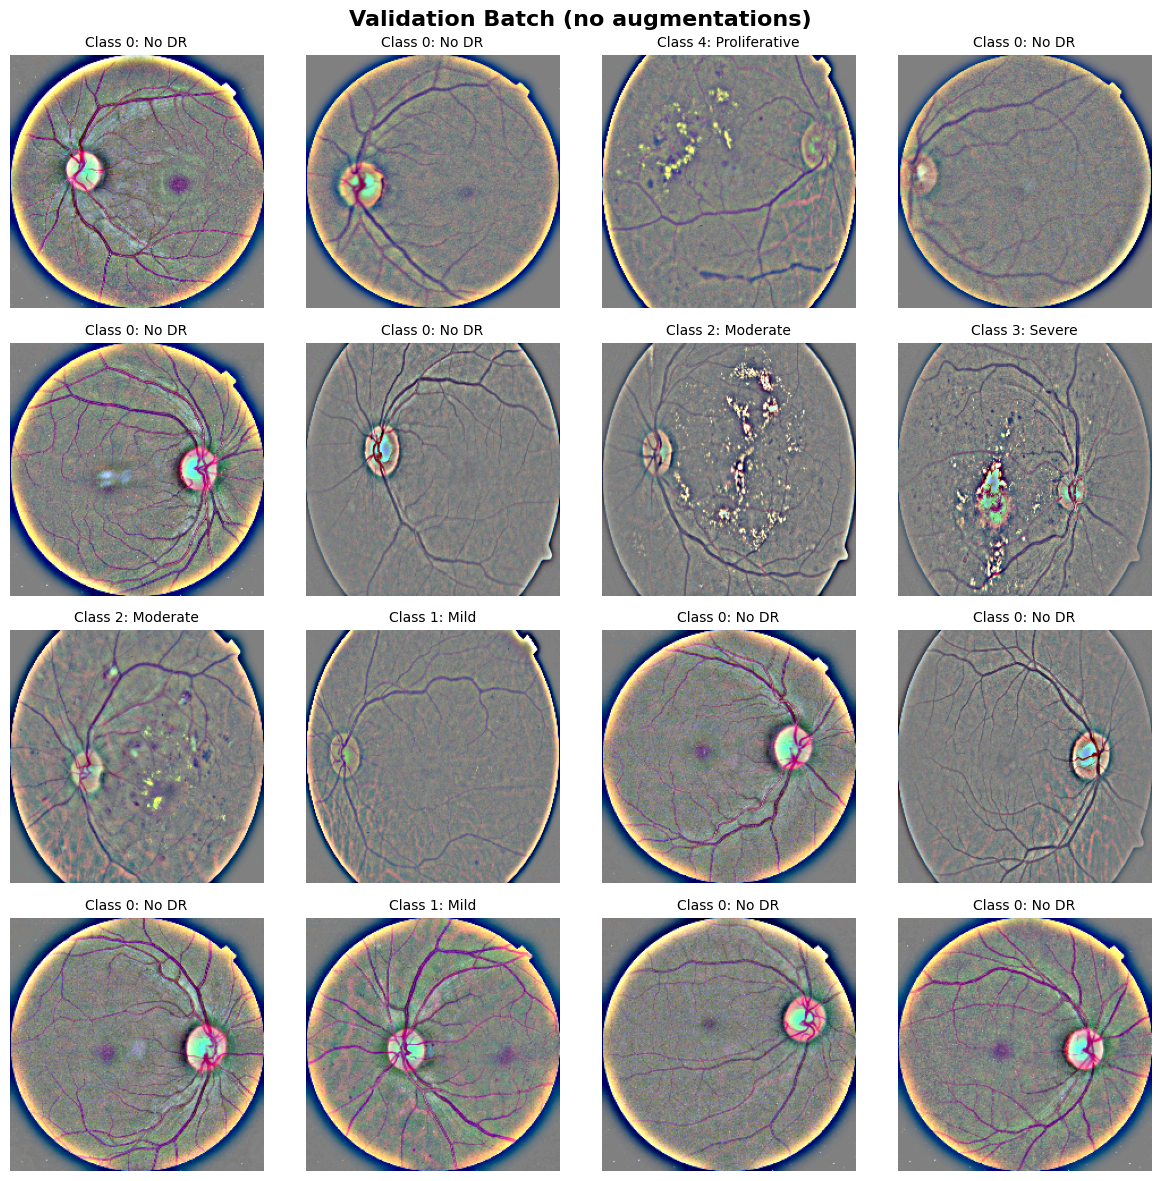

In [15]:
val_images, val_labels = next(iter(val_loader))

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Validation Batch (no augmentations)', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    if idx < len(val_images):
        img = denormalize(val_images[idx]).permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        
        ax.imshow(img)
        ax.set_title(f'Class {val_labels[idx]}: {class_names[val_labels[idx]]}', fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

## Summary

In [16]:
print("="*60)
print("DATA PIPELINE TEST SUMMARY")
print("="*60)
print(f"✓ Dataloaders created successfully")
print(f"✓ Train batches: {len(train_loader)}")
print(f"✓ Val batches: {len(val_loader)}")
print(f"✓ Batch size: {images.shape[0]}")
print(f"✓ Image size: {images.shape[2]}x{images.shape[3]}")
print(f"✓ Preprocessing working")
print(f"✓ Augmentation working (see visualizations)")
print(f"✓ Class weights calculated")
print("="*60)
print("\n✓ Ready for model training!")

DATA PIPELINE TEST SUMMARY
✓ Dataloaders created successfully
✓ Train batches: 184
✓ Val batches: 46
✓ Batch size: 16
✓ Image size: 224x224
✓ Preprocessing working
✓ Augmentation working (see visualizations)
✓ Class weights calculated

✓ Ready for model training!
